Численное решение модели Изинга в интернете:

https://github.com/prtkm/ising-monte-carlo/blob/master/ising-monte-carlo.org

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

def init_lattice(n):

    '''Create a nxn lattice with random spin configuration'''
    
    lattice = np.random.choice([1, -1], size=(n, n))
    return lattice


def deltaE(S0, Sn, J, H):

    '''Energy difference for a spin flip'''
    
    return 2 * S0 * (H + J * Sn)


def ising(n=200, 
          nsteps=500000,
          H=0,
          J=1,
          T=1,
          count_spins = False,
          countij = [1,1],
          correlation=False,
          corr_ij=[0,0],
          corr_r=1):

    '''Ising Model Simulator. If count_spins = True, only flipping behavior of 1 site is studied.'''
    
    lattice = init_lattice(n)
    energy = 0
    energies = []
    spins = []
    spin = np.sum(lattice)
    icount, jcount = countij
    counted_spins = [lattice[icount, jcount]]
    counted_intervals = []
    icorr, jcorr = corr_ij
    Sis = []
    SiSjs = []
    
    for step in range(nsteps):

        i = np.random.randint(n)
        j = np.random.randint(n)

        # Periodic Boundary Condition
        Sn = lattice[(i - 1) % n, j] + lattice[(i + 1) % n, j] + \
             lattice[i, (j - 1) % n] + lattice[i, (j + 1) % n]

        dE = deltaE(lattice[i, j], Sn, J, H)

        if dE < 0 or np.random.random() < np.exp(-dE/T):
            lattice[i, j] = -lattice[i, j]
            energy += dE
            energies.append(energy)
         # Note that the spin is collected at every step
            spin += 2*lattice[i, j]
        
        if count_spins:
            ispin = lattice[icount, jcount]
            if ispin != counted_spins[-1]:
                counted_spins.append(ispin)
                counted_interval = step - sum(counted_intervals)

                counted_intervals.append(counted_interval)
        if correlation:
            Sn_corr = lattice[(icorr - corr_r) % n, jcorr] + lattice[(icorr + corr_r) % n, jcorr] + \
                      lattice[icorr, (jcorr - corr_r) % n] + lattice[icorr, (jcorr + corr_r) % n]
            Si = lattice[icorr, jcorr]
            SiSj = Si * Sn_corr / 4.0
            Sis.append(Si)
            SiSjs.append(SiSj)
            
        spins.append(spin)


    if correlation:
        return Sis, SiSjs
    
    if count_spins:
        return counted_spins, counted_intervals
        
    return lattice, energies, spins

In [2]:
#time_now = time.time()
#lattice, energies, spins = ising(n=100, 
#          nsteps=100000,
#          H=0,
#          J=1,
#          T=1,
#          count_spins = False,
#          countij = [1,1],
#          correlation=False,
#          corr_ij=[0,0],
#          corr_r=1)
#print("--- seconds ---", time.time() - time_now)

In [3]:
#C++ calculations of 
global_energies_cpp_2 = []
T_2 = []
for i in range(2500000, 4000000, 3000):
    ss = str(i)
    number = ss[0]+'.'+ss[1:]
    T_2.append(float(number))
    global_energies_cpp_2.append(np.array(pd.read_csv("./calculations/E_" + number + ".csv")))
    

In [4]:
#C++ calculations of 
global_energies_cpp_1 = []
T_1 = []
for i in range(1000000, 2500000, 15000):
    ss = str(i)
    number = ss[0]+'.'+ss[1:]
    T_1.append(float(number))
    global_energies_cpp_1.append(np.array(pd.read_csv("./calculations/E_" + number + ".csv")))
    

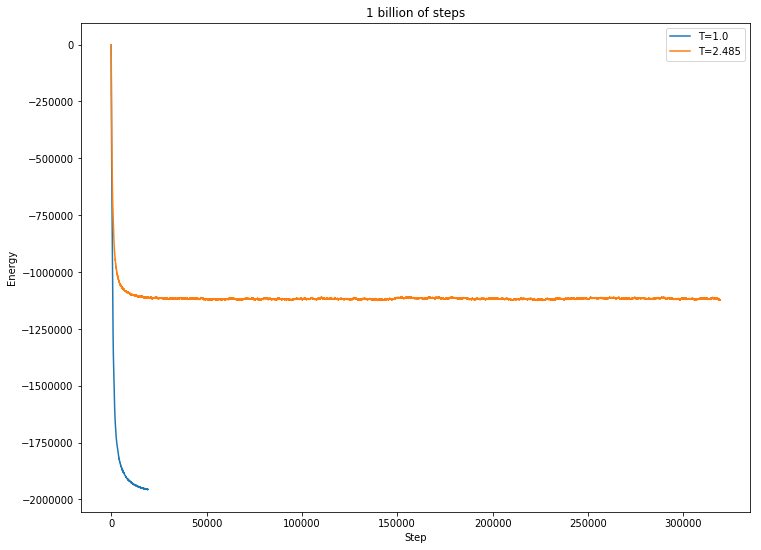

In [5]:
figure = plt.figure(figsize=(12, 9))


#for i in range(len(global_energies_cpp)):
plt.plot(global_energies_cpp_1[0], label="T=" + str(T_1[0]))
plt.plot(global_energies_cpp_1[-1], label="T=" + str(T_1[-1]))


plt.legend()
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("1 billion of steps")

plt.show()

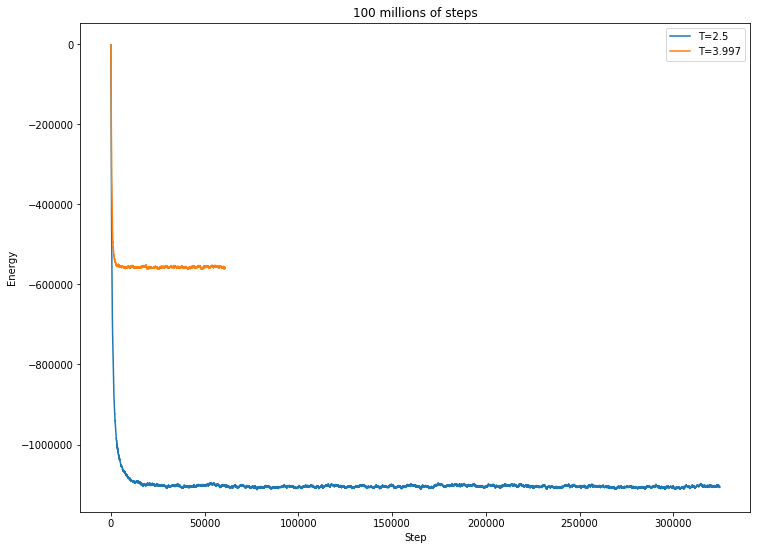

In [6]:
figure = plt.figure(figsize=(12, 9))


#for i in range(len(global_energies_cpp)):
plt.plot(global_energies_cpp_2[0], label="T=" + str(T_2[0]))
plt.plot(global_energies_cpp_2[-1], label="T=" + str(T_2[-1]))


plt.legend()
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("100 millions of steps")

plt.show()

In [7]:
E_1 = [i[-1] for i in global_energies_cpp_1]
E_2 = [i[-1] for i in global_energies_cpp_2]

#T(E) dependency
T = np.concatenate((T_1, T_2))
E = np.concatenate((E_1, E_2))

In [8]:
#Calculate numerical derivative
C = []
for i in range(1, len(E) - 1):
    C.append((E[i + 1] - E[i - 1]) / (T[i + 1] - T[i - 1]))

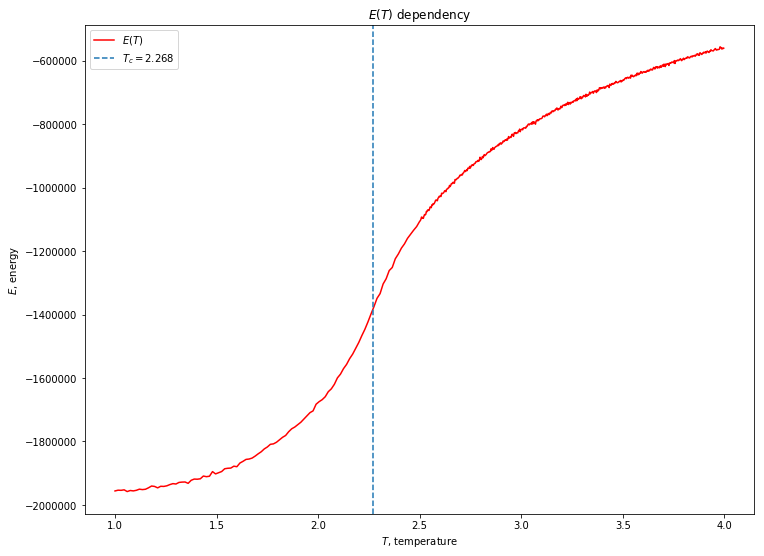

In [9]:
figure = plt.figure(figsize=(12, 9))

plt.plot(T, E, label="$E(T)$", color='red')
plt.axvline(2.268, label="$T_c=2.268$", linestyle="--")


plt.legend()
plt.xlabel("$T$, temperature")
plt.ylabel("$E$, energy")
plt.title("$E(T)$ dependency")


plt.show()

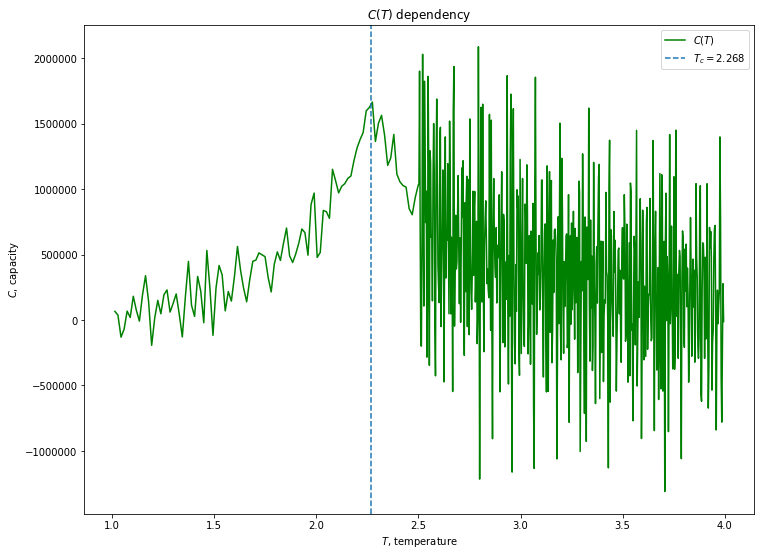

In [11]:
figure = plt.figure(figsize=(12, 9))

plt.plot(T[1:-1], C, label="$C(T)$", color='green')
plt.axvline(2.268, label="$T_c=2.268$", linestyle="--")


plt.legend()
plt.xlabel("$T$, temperature")
plt.ylabel("$C$, capacity")
plt.title("$C(T)$ dependency")


plt.show()